### clean data from PFAF

In [22]:
import pandas as pd
import re
import numpy as np
from collections import Counter

In [118]:
pfaf = pd.read_csv('pfaf_data.csv')

In [3]:
pfaf.to_csv('pfaf_data_original.csv', index=False)

In [119]:
pfaf = pfaf.drop_duplicates()

In [89]:
pfaf.columns

Index(['Care', 'Common Name', 'Cultivation details', 'Edibility Rating',
       'Edible Uses', 'Family', 'Found In', 'Genus', 'Habitats',
       'Known Hazards', 'Medicinal Rating', 'Medicinal Uses', 'Other Names',
       'Other Uses', 'Physical Characteristics', 'Propagation', 'Range',
       'Species', 'Summary', 'Synonyms', 'USDA hardiness', 'Weed Potential',
       'Unnamed: 22'],
      dtype='object')

In [90]:
for c in pfaf.columns:
    print(c, pfaf[c].isnull().sum())

Care 0
Common Name 4009
Cultivation details 4007
Edibility Rating 4005
Edible Uses 4007
Family 4005
Found In 5432
Genus 0
Habitats 4112
Known Hazards 4005
Medicinal Rating 4005
Medicinal Uses 4005
Other Names 5435
Other Uses 4005
Physical Characteristics 4005
Propagation 4027
Range 4006
Species 0
Summary 5145
Synonyms 4823
USDA hardiness 4005
Weed Potential 5449
Unnamed: 22 5577


### edible uses

In [91]:
pfaf['Edibility Rating'].unique()

array([nan, '   (1 of 5)', '   (3 of 5)', '   (0 of 5)', '   (2 of 5)',
       '   (4 of 5)', '   (5 of 5)'], dtype=object)

In [120]:
pfaf.fillna('', inplace=True)
pfaf['Edibility Rating'].replace('', '0', inplace=True)

In [121]:
pfaf['Edibility Rating'] = pfaf['Edibility Rating'].str.extract(r'([0-9])').astype(int)

In [122]:
pfaf['Edible Uses'].iloc[1]

'Edible Parts: Inner bark\nEdible Uses: Gum  Tea\n\nYoung shoot tips are used as a substitute for tea[177, 183]. The pitch obtained from the bark can be hardened (probably by immersing it in cold water[K]) and used as a chewing gum[257]. Inner bark[257]. No further information is given, but inner bark can be dried, ground into a powder and then used with grain flours etc to make bread and other preparations[257].'

In [123]:
edible_cols = pfaf['Edible Uses'].str.split('\n', expand=True)
edible_cols[['Genus', 'Species']] = pfaf[['Genus', 'Species']]
edible_cols.fillna('', inplace=True)

In [235]:
edible_parts_counts = Counter()
edible_uses_counts = Counter()
edible_cols[edible_cols[0].str.contains('Edible Parts')][0].str.split().apply(
    edible_parts_counts.update)
edible_cols[edible_cols[1].str.contains('Edible Uses')][1].str.split().apply(
    edible_uses_counts.update)
edible_parts_counts.most_common()

[('Edible', 1188),
 ('Parts:', 1188),
 ('Leaves', 400),
 ('Seed', 361),
 ('Fruit', 331),
 ('Root', 282),
 ('Flowers', 155),
 ('Stem', 86),
 ('Oil', 80),
 ('Inner', 59),
 ('bark', 59),
 ('Seedpod', 42),
 ('Sap', 35),
 ('Nectar', 5),
 ('Manna', 3),
 ('Pollen', 3),
 ('Apical', 1),
 ('bud', 1),
 ('Shoots', 1)]

In [134]:
edible_cols[edible_cols[0].str.contains('Nectar')]

,0,1,2,3,Genus,Species
106,Edible Parts: Nectar Seed,Edible Uses:,,Seed - cooked. Said to be as sweet as a chestn...,Aesculus,flava
1658,Edible Parts: Fruit Nectar,Edible Uses:,,"Fruit - raw[60, 105]. A sweet flavour[61]. The...",Comandra,umbellata
2858,Edible Parts: Nectar,Edible Uses: Tea,,The plant has been boiled up as a tea[257]. Th...,Ipomopsis,aggregata
3132,Edible Parts: Fruit Nectar,Edible Uses:,,"Fruit - raw or cooked[105, 177, 212]. Not tast...",Lonicera,ciliosa
3326,Edible Parts: Fruit Nectar,Edible Uses:,,"Fruit - fresh or dried[61, 105, 183]. The frui...",Menziesia,ferruginea


In [135]:
edible_cols[3].loc[2858]

'The plant has been boiled up as a tea[257]. The nectar is sucked from the flowers by children[257].'

In [136]:
edible_cols[edible_cols[0].str.contains('Manna')]

,0,1,2,3,Genus,Species
2987,Edible Parts: Manna Sap,Edible Uses: Gum Sweetener,,"A gum, or resin, is produced under the bark. I...",Larix,occidentalis
4303,Edible Parts: Inner bark Manna,Edible Uses: Coffee Condiment Gum Tea,,Young shoot tips - used as a flavouring in coo...,Pseudotsuga,menziesii
4653,Edible Parts: Flowers Inner bark Manna,Edible Uses: Tea,,A honeydew can be obtained from the cut branch...,Salix,gooddingii


In [137]:
edible_cols[edible_cols[0].str.contains('Pollen')]

,0,1,2,3,Genus,Species
4761,Edible Parts: Pollen Root Seed Stem,Edible Uses:,,Root - raw or cooked[172]. Rich in starch. Ste...,Scirpus,microcarpus
5378,Edible Parts: Flowers Leaves Oil Pollen Ro...,Edible Uses: Oil,,Roots - raw or cooked[145]. Rich in starch[105...,Typha,domingensis
5379,Edible Parts: Flowers Leaves Oil Pollen Ro...,Edible Uses: Oil,,"Roots - raw or cooked[2, 12]. They can be boil...",Typha,latifolia


In [138]:
edible_cols[(~edible_cols[0].str.contains('Edible Parts:')) & 
            ~(edible_cols[0]=='') & ~(edible_cols[0]=='None known') & 
            ~(edible_cols[0]=='0')][0].head()

76     Leaves - cooked[105]. Some caution is advised,...
101         Seeds[257]. No further information is given.
192    The heart of the plant is very rich in sacchar...
278        Catkins - raw or cooked. A bitter taste[172].
441    Young leaves - cooked[177]. Used as a potherb[...
Name: 0, dtype: object

In [139]:
edible_cols[3] = np.where(((~edible_cols[0].str.contains('Edible Parts:')) & 
            ~(edible_cols[0]=='') & ~(edible_cols[0]=='None known') & 
            ~(edible_cols[0]=='0')), edible_cols[0], edible_cols[3])

In [140]:
edible_cols.loc[76]

0          Leaves - cooked[105]. Some caution is advised,...
1                                                           
2                                                           
3          Leaves - cooked[105]. Some caution is advised,...
Genus                                                 Actaea
Species                                             racemosa
Name: 76, dtype: object

In [146]:
pfaf['Edible inner bark'] = edible_cols[0].str.lower().str.contains('inner bark')
pfaf['Edible roots'] = edible_cols[0].str.lower().str.contains('root')
pfaf['Edible seeds'] = edible_cols[0].str.lower().str.contains('seed')
pfaf['Edible seedpods'] = edible_cols[0].str.lower().str.contains('seedpod')
pfaf['Edible sap'] = (edible_cols[0].str.lower().str.contains('sap') | 
                      edible_cols[0].str.lower().str.contains('manna'))
pfaf['Edible leaves'] = edible_cols[0].str.lower().str.contains('leaves')
pfaf['Edible flowers'] = edible_cols[0].str.lower().str.contains('flowers')
pfaf['Edible fruit'] = edible_cols[0].str.lower().str.contains('fruit')
pfaf['Edible stems'] = edible_cols[0].str.lower().str.contains('stem')
pfaf['Edible oil'] = edible_cols[0].str.lower().str.contains('oil')
pfaf['Edible shoots'] = edible_cols[3].str.lower().str.contains('shoots')

In [236]:
edible_uses_counts.most_common()

[('Edible', 1188),
 ('Uses:', 1188),
 ('Tea', 174),
 ('Condiment', 120),
 ('Oil', 80),
 ('Gum', 61),
 ('Coffee', 58),
 ('Drink', 38),
 ('Sweetener', 36),
 ('Pectin', 7),
 ('Colouring', 7),
 ('Chocolate', 4),
 ('Curdling', 3),
 ('agent', 3),
 ('Milk', 2),
 ('Rutin', 1),
 ('Salt', 1),
 ('Stabilizer', 1),
 ('Gelatine', 1)]

In [149]:
pfaf['Edible use gum'] = edible_cols[1].str.lower().str.contains('gum')
pfaf['Edible use drink'] = (edible_cols[1].str.lower().str.contains('tea') | 
                            edible_cols[1].str.lower().str.contains('drink') |
                            edible_cols[1].str.lower().str.contains('coffee'))
pfaf['Edible use condiment'] = edible_cols[1].str.lower().str.contains('condiment')
pfaf['Edible use sweetener'] = edible_cols[1].str.lower().str.contains('sweetener')
pfaf['Edible use oil'] = edible_cols[1].str.lower().str.contains('oil')

In [164]:
pfaf['Edible description'] = edible_cols[3]

In [160]:
pfaf.drop('Edible Uses', axis=1, inplace=True)

In [150]:
pfaf.to_csv('pfaf_data.csv', index=False)

### medicinal uses

In [151]:
pfaf['Medicinal Rating'].unique()

array(['', '   (2 of 5)', '   (5 of 5)', '   (3 of 5)', '   (1 of 5)',
       '   (0 of 5)', '   (4 of 5)'], dtype=object)

In [153]:
pfaf['Medicinal Rating'].replace('', '0', inplace=True)
pfaf['Medicinal Rating'] = pfaf['Medicinal Rating'].str.extract(r'([0-9])').astype(int)

In [163]:
pfaf['Medicinal Uses'].iloc[1]

"Plants For A Future can not take any responsibility for any adverse effects from the use of plants. Always seek advice from a professional before using a plant medicinally.\n\n\nThis plant was used quite widely by native North American Indians. An infusion of the bark was used as a tonic and to treat stomach ailments, TB, haemorrhoids and various minor complaints[257]. The pitch, or resin, was also used to treat colds, sore throats etc[257]. The bark of this tree contains blisters that are filled with a resin called 'Canadian Balsam'[226]. Although the report does not mention the uses of this resin, it can almost certainly be used in the same ways as the resin of A. balsamea, as detailed below:- The resin obtained from this tree (see 'Uses notes' below) has been used throughout the world and is a very effective antiseptic and healing agent. It is used as a healing and analgesic protective covering for burns, bruises, wounds and sores[213, 222, 226]. It is also used to treat sore nippl

In [165]:
medicinal_cols = pfaf['Medicinal Uses'].str.split('\n', expand=True)
medicinal_cols[['Genus', 'Species']] = pfaf[['Genus', 'Species']]
medicinal_cols.fillna('', inplace=True)

In [166]:
medicinal_cols.head()

,0,1,2,3,4,5,Genus,Species
0,,,,,,,Abutilon,abutiloides
1,Plants For A Future can not take any responsib...,,,This plant was used quite widely by native Nor...,,,Abies,amabilis
2,Plants For A Future can not take any responsib...,Analgesic Antiscorbutic Antiseptic Diuretic...,,,The resin obtained from the balsam fir (see 'U...,,Abies,balsamea
6,,,,,,,Abutilon,berlandieri
7,,,,,,,Abies,bracteata


In [167]:
medicinal_cols[0].unique()

array(['',
       'Plants For A Future can not take any responsibility for any adverse effects from the use of plants. Always seek advice from a professional before using a plant medicinally.'],
      dtype=object)

In [237]:
medicinal_counter = Counter()
medicinal_cols[1].str.split().apply(medicinal_counter.update)
medicinal_cols[2].str.split().apply(medicinal_counter.update)
medicinal_counter.most_common()

[('Astringent', 248),
 ('Diuretic', 224),
 ('Poultice', 221),
 ('Tonic', 174),
 ('Febrifuge', 150),
 ('Stomachic', 132),
 ('Diaphoretic', 130),
 ('Ophthalmic', 95),
 ('Salve', 95),
 ('Antiseptic', 93),
 ('Laxative', 91),
 ('Emetic', 89),
 ('Analgesic', 86),
 ('Antirheumatic', 85),
 ('Expectorant', 81),
 ('Antispasmodic', 76),
 ('Skin', 72),
 ('Miscellany', 72),
 ('Pectoral', 71),
 ('Sedative', 66),
 ('Stimulant', 65),
 ('Odontalgic', 54),
 ('VD', 52),
 ('Carminative', 49),
 ('Cancer', 49),
 ('Anodyne', 48),
 ('Emmenagogue', 47),
 ('Birthing', 44),
 ('aid', 44),
 ('Vulnerary', 44),
 ('TB', 40),
 ('Cathartic', 40),
 ('Kidney', 40),
 ('Vermifuge', 38),
 ('Appetizer', 35),
 ('Alterative', 35),
 ('Anthelmintic', 34),
 ("Women's", 34),
 ('complaints', 34),
 ('Blood', 32),
 ('Parasiticide', 32),
 ('Hypotensive', 31),
 ('Antiinflammatory', 30),
 ('Cardiac', 30),
 ('Haemostatic', 29),
 ('Rubefacient', 28),
 ('Cardiotonic', 27),
 ('Purgative', 26),
 ('Contraceptive', 26),
 ('Stings', 26),
 ('Gal

In [197]:
to_remove = ['Alterative', 'Aromatherapy', 'Homeopathy', 'Antiscorbutic', 'Tonic', 
             'tonic', 'Blood', 'purifier', 'Cardiotonic', 'Cholagogue', 'Uterine', 
             'complaints', 'Antihalitosis', 'care', 'Miscellany', 'aid', 
             'Aromatic', 'Deobstruent', 'Acrid', 'Enuresis', 'Nutritive']

In [198]:
for use in medicinal_counter.keys():
    pfaf[use] = (medicinal_cols[1].str.contains(use) | 
                 medicinal_cols[2].str.contains(use))

In [199]:
pfaf['Laxative'] = (pfaf['Laxative'] | pfaf['Aperient'] | pfaf['Cathartic'])
to_remove.append('Aperient')
to_remove.append('Cathartic')
pfaf['Purgative'] = (pfaf['Purgative'] | pfaf['Hydrogogue'])
to_remove.append('Hydrogogue')
pfaf['Cancer'] = (pfaf['Cancer'] | pfaf['Antitumor'] | pfaf['Cytostatic'] | 
                  pfaf['Cytotoxic'] | pfaf['Resolvent'])
to_remove.append('Antitumor')
to_remove.append('Cytostatic')
to_remove.append('Cytotoxic')
to_remove.append('Resolvent')
pfaf['Fever'] = (pfaf['Antipyretic'] | pfaf['Febrifuge'])
to_remove.append('Antipyretic')
to_remove.append('Febrifuge')
pfaf['Stimulant'] = (pfaf['Stimulant'] | pfaf['Stimulants'])
to_remove.append('Stimulants')
pfaf['Birthing'] = (pfaf['Birthing'] | pfaf['Oxytoxic'])
to_remove.append('Oxytoxic')
pfaf['Female misc'] = pfaf["Women's"]
to_remove.append("Women's")

In [200]:
pfaf.drop(to_remove, axis=1, inplace=True)

In [183]:
pfaf['Medicinal description'] = (medicinal_cols[3] + 
    medicinal_cols[4] + medicinal_cols[5])

### habitats

In [234]:
habitats = pfaf['Habitats'].copy()
habitats_counts = Counter()
habitats.str.split(';').apply(habitats_counts.update)
habitats_counts.most_common()

[('', 5497),
 (' Cultivated Beds', 545),
 ('Woodland Garden Sunny Edge', 446),
 (' Dappled Shade', 335),
 (' Shady Edge', 272),
 ('Woodland Garden Canopy', 194),
 ('Woodland Garden Dappled Shade', 193),
 (' Bog Garden', 181),
 (' Ground Cover', 91),
 (' not Deep Shade', 82),
 (' Pond', 73),
 (' Sunny Edge', 62),
 ('Woodland Garden Secondary', 54),
 (' Hedge', 39),
 (' Secondary', 35),
 (' Meadow', 28),
 (' South Wall. By. West Wall. By.', 24),
 (' East Wall. By. South Wall. By.', 22),
 (' East Wall. By. South Wall. By. West Wall. By.', 11),
 (' Lawn', 8),
 (' Hedgerow', 8),
 (' East Wall. In. South Wall. In. West Wall. In.', 8),
 (' North Wall. In. East Wall. In. West Wall. In.', 4),
 (' North Wall. In. East Wall. In.', 4),
 (' South Wall. By.', 2),
 (' North Wall. By. East Wall. By.', 2),
 ('Woodland Garden Cultivated Beds', 1),
 ('Woodland Garden Shady Edge', 1),
 (' East Wall. In. West Wall. In.', 1),
 (' East Wall. By. West Wall. By.', 1),
 (' East Wall. In.', 1)]

In [159]:
pfaf['Canopy'] = habitats.str.contains('Canopy')
pfaf['Understory'] = habitats.str.contains('Secondary')
pfaf['Cultivated Beds'] = habitats.str.contains('Cultivated Beds')
pfaf['Dappled Shade'] = habitats.str.contains('Dappled Shade')
pfaf['Sunny Edge'] = habitats.str.contains('Sunny Edge')
pfaf['Ground Cover'] = habitats.str.contains('Ground Cover')
pfaf['Meadow'] = habitats.str.contains('Meadow')
pfaf['Shady Edge'] = habitats.str.contains('Shady Edge')
pfaf['Bog'] = habitats.str.contains('Bog')
pfaf['Hedge'] = habitats.str.contains('Hedge')
pfaf['Pond'] = habitats.str.contains('Pond')

In [161]:
pfaf.drop('Habitats', axis=1, inplace=True)

In [201]:
pfaf.to_csv('pfaf_data.csv', index=False)

### other uses

In [202]:
pfaf['Other Uses'].head()

0                                                     
1    Gum  Wood\n\nThe boughs are fragrant and can b...
2    Adhesive  Fibre  Gum  Kindling  Microscope  Re...
6                                                     
7                                                     
Name: Other Uses, dtype: object

In [209]:
other_uses_cols = pfaf['Other Uses'].str.split('\n', expand=True)

In [210]:
other_uses_cols[:10]

,0,1,2
0,,None,None
1,Gum Wood,,The boughs are fragrant and can be hung in the...
2,Adhesive Fibre Gum Kindling Microscope Re...,,"The balsamic resin 'Balm of Gilead'[11, 46] or..."
6,,None,None
7,,None,None
8,Dye Wood,,A tan coloured dye can be obtained from the ba...
9,Adhesive Gum Microscope Repellent Resin S...,,"Wood - light, soft, coarse grained, not strong..."
10,None known,None,None
11,,None,None
12,Baby care Dye Gum Incense Repellent Roofi...,,The aromatic leaves are used as a moth repelle...


In [211]:
other_uses_cols[1].describe()

count     803
unique      1
top          
freq      803
Name: 1, dtype: object

In [227]:
other_uses_cols.fillna('', inplace=True)

In [219]:
other_uses_cols[1] = np.where(other_uses_cols[0].str.contains('\.'), other_uses_cols[0], '')
other_uses_cols[0] = np.where(other_uses_cols[1]=='', other_uses_cols[0], '')

In [228]:
other_uses_cols[1] = other_uses_cols[1] + other_uses_cols[2]

In [230]:
other_uses_cols.drop(2, axis=1, inplace=True)

In [238]:
other_uses_counter = Counter()
other_uses_cols[0].str.split(' ').apply(other_uses_counter.update)
common_uses = other_uses_counter.most_common()
common_uses

[('', 5628),
 ('None', 584),
 ('known', 584),
 ('Dye', 274),
 ('Wood', 266),
 ('Repellent', 107),
 ('Fibre', 85),
 ('Oil', 80),
 ('Hedge', 78),
 ('Soil', 77),
 ('Tannin', 77),
 ('Miscellany', 72),
 ('Basketry', 71),
 ('Fuel', 70),
 ('stabilization', 66),
 ('Gum', 61),
 ('Soap', 50),
 ('Hair', 41),
 ('Herbicide', 38),
 ('Shelterbelt', 35),
 ('Incense', 32),
 ('Parasiticide', 32),
 ('Essential', 31),
 ('Latex', 30),
 ('Stuffing', 29),
 ('Weaving', 26),
 ('Paper', 25),
 ('Resin', 23),
 ('String', 23),
 ('Adhesive', 22),
 ('Disinfectant', 22),
 ('Insecticide', 22),
 ('Pioneer', 19),
 ('Broom', 18),
 ('Tinder', 18),
 ('Mordant', 17),
 ('Rootstock', 16),
 ('Charcoal', 15),
 ('Brush', 15),
 ('Waterproofing', 13),
 ('Pollution', 13),
 ('Companion', 12),
 ('Cosmetic', 12),
 ('Musical', 12),
 ('Preservative', 11),
 ('Thatching', 11),
 ('Beads', 11),
 ('Baby', 10),
 ('care', 10),
 ('Fungicide', 10),
 ('Wick', 9),
 ('Insulation', 9),
 ('Pitch', 9),
 ('Containers', 8),
 ('Needles', 8),
 ('Teeth', 8

In [240]:
pfaf['Oil other uses'] = other_uses_cols[0].str.contains('Oil')

In [242]:
del other_uses_counter['']
del other_uses_counter['None']
del other_uses_counter['known']
del other_uses_counter['Oil']
del other_uses_counter['Soil']
other_uses_counter['Soil stabilization'] = other_uses_counter['stabilization']
del other_uses_counter['stabilization']
other_uses_counter['Baby care'] = other_uses_counter['Baby']
del other_uses_counter['Baby']
del other_uses_counter['care']
other_uses_counter['Soil reclamation'] = other_uses_counter['reclamation']
del other_uses_counter['reclamation']
other_uses_counter['Liquid feed'] = other_uses_counter['Liquid']
del other_uses_counter['Liquid']
del other_uses_counter['feed']
other_uses_counter['Green manure'] = other_uses_counter['Green']
del other_uses_counter['Green']
del other_uses_counter['manure']
other_uses_counter['Rooting hormone'] = other_uses_counter['Rooting']
del other_uses_counter['Rooting']
del other_uses_counter['hormone']
del other_uses_counter['Deodorant']
other_uses_counter['Soil conditioner'] = other_uses_counter['conditioner']
del other_uses_counter['conditioner']
other_uses_counter['Friction sticks'] = other_uses_counter['Friction']
del other_uses_counter['Friction']
del other_uses_counter['sticks']
other_uses_counter['Fire retardant'] = other_uses_counter['Fire']
del other_uses_counter['Fire']
del other_uses_counter['retardant']
del other_uses_counter['paper']
other_uses_counter = {k:v for k,v in other_uses_counter.items() if k not in ['Besom',
                      'Darning', 'ball', 'Blotting', 'Other', 'Uses', 'Waxed', 'Fruit', 
                      'ripening', 'making']}

In [243]:
for k in other_uses_counter.keys():
    pfaf[k] = other_uses_cols[0].str.contains(k)

In [244]:
pfaf['Other uses description'] = other_uses_cols[1]
pfaf.drop('Other Uses', axis=1, inplace=True)

In [248]:
to_drop = []
pfaf['Fertilizer'] = (pfaf['Green manure'] | pfaf['Fertilizer'] | 
                      pfaf['Liquid feed'] | pfaf['Soil conditioner'])
to_drop = to_drop + ['Green manure', 'Liquid feed', 'Soil conditioner']
pfaf['Kindling'] = (pfaf['Kindling'] | pfaf['Tinder'])
to_drop.append('Tinder')
pfaf['Fibre'] = (pfaf['Fibre'] | pfaf['String'])
to_drop.append('String')
pfaf['Building material'] = (pfaf['Insulation'] | pfaf['Pipes'] | pfaf['Pitch'] | 
                             pfaf['Plaster'] | pfaf['Roofing'] | pfaf['Thatching'])
to_drop = to_drop + ['Insulation', 'Pipes', 'Pitch', 'Plaster', 'Roofing', 'Thatching']
pfaf['Sewing'] = (pfaf['Buttons'] | pfaf['Needles'] | pfaf['Pins'] | pfaf['Starch'] | 
                  pfaf['Stuffing'])
to_drop = to_drop + ['Buttons', 'Needles', 'Pins', 'Starch', 'Stuffing']
pfaf['Miscellany'] = (pfaf['Miscellany'] | pfaf['Microscope'] | pfaf['Bedding'] | 
                      pfaf['Brush'] | pfaf['Lining'] | pfaf['Packing'] | 
                      pfaf['Scourer'] | pfaf['Strewing'] | pfaf['Filter'] | 
                      pfaf['Straw'] | pfaf['Litmus'])
to_drop = to_drop + ['Microscope', 'Bedding', 'Brush', 'Lining', 'Packing', 'Scourer', 
                     'Strewing', 'Filter', 'Straw', 'Litmus']
pfaf['Weaving'] = (pfaf['Weaving'] | pfaf['Basketry'])
pfaf = pfaf.rename({'Essential': 'Essential oil', 'Teeth': 'Tooth care', 
             'Shelterbelt': 'Windbreak', 'Rust': 'Rust treatment'}, axis=1)
pfaf.drop(to_drop, axis=1, inplace=True)

In [249]:
pfaf.to_csv('pfaf_data.csv', index=False)

### special uses

In [254]:
# special uses section was not captured by previous scrape. 
import selenium
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [272]:
options = Options()
options.headless = True
driver = Firefox(options=options)

In [283]:
special_uses_df = pd.DataFrame()
length = len(pfaf)
for i, (genus,species) in enumerate(pfaf[['Genus', 'Species']].values):
    if i % 100 == 0:
        driver.quit()
        driver = Firefox(options=options)
        print(f'\n {i}/{length}')
    elif i % 5 == 0:
        print('.', end='')
    special_uses = {'Genus': genus, 'Species': species}
    driver.get(f'https://pfaf.org/user/Plant.aspx?LatinName={genus}+{species}')
    special_uses['Special uses'] = driver.find_element_by_xpath('//h3[contains('
        'text(), "Special Uses")]/following-sibling::*/descendant::span').text
    special_uses_df = special_uses_df.append(special_uses, ignore_index=True)
driver.quit()
pfaf = pfaf.merge(special_uses_df, on=['Genus', 'Species'])

In [282]:
pfaf.to_csv('pfaf_data.csv', index=False)

In [307]:
special_use_counter = Counter()
pfaf['Special uses'].str.lower().str.split(' ').apply(special_use_counter.update)
special_use_counter.most_common()

[('', 5336),
 ('food', 335),
 ('forest', 335),
 ('scented', 201),
 ('plants', 201),
 ('ground', 112),
 ('cover', 112),
 ('attracts', 103),
 ('wildlife', 103),
 ('carbon', 90),
 ('farming', 90),
 ('hedge', 78),
 ('nitrogen', 74),
 ('fixer', 74),
 ('dynamic', 44),
 ('accumulator', 44)]

In [322]:
special_uses = ['Food forest', 'Scented plants', 'Ground cover', 'Attracts wildlife', 
                'Carbon farming', 'Nitrogen fixer', 'Dynamic accumulator']

In [323]:
for use in special_uses:
    pfaf[use] = pfaf['Special uses'].str.lower().str.contains(use.lower())

In [337]:
pfaf[special_uses].describe()

,Food forest,Scented plants,Ground cover,Attracts wildlife,Carbon farming,Nitrogen fixer,Dynamic accumulator
count,5577,5577,5577,5577,5577,5577,5577
unique,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False
freq,5243,5376,5465,5474,5487,5503,5533


In [381]:
pfaf.drop('special uses', axis=1, inplace=True)

In [338]:
pfaf.to_csv('pfaf_data.csv', index=False)

### hardiness zone, care

In [352]:
hardiness = pfaf['USDA hardiness'].str.split(r'([0-9]+)-([0-9]+)',expand=True)
hardiness.head()

,0,1,2,3
0,,None,None,None
1,,4,8,
2,,3,6,
3,,None,None,None
4,,None,None,None


In [354]:
for i in hardiness.columns:
    print(hardiness[i].value_counts())

               5198
Coming soon     379
Name: 0, dtype: int64
4     394
3     230
5     201
6     127
7     110
8      60
2      32
10     19
9      16
1       4
Name: 1, dtype: int64
9     374
8     368
7     170
10    138
11     85
12     27
6      24
5       6
4       1
Name: 2, dtype: int64
    1193
Name: 3, dtype: int64


In [356]:
hardiness.drop([0, 3], axis=1, inplace=True)

In [359]:
pfaf['Min zone'] = hardiness[1]
pfaf['Max zone'] = hardiness[2]

In [366]:
pfaf = pfaf.rename({c: c.lower() for c in pfaf.columns}, axis=1)

In [379]:
pfaf.drop('usda hardiness', axis=1, inplace=True)

In [374]:
pfaf['care'][~(pfaf['care']=='')].head()

0                                                   []
1    ['Fully Hardy', 'Moist Soil', 'Full shade', 'S...
2    ['Fully Hardy', 'Moist Soil', 'Full shade', 'S...
3                                                   []
4                                                   []
Name: care, dtype: object

In [375]:
care_counter = Counter()

def get_care(l):
    care_counter.update(eval(l))
    
pfaf['care'].apply(get_care)
care_counter.most_common()

[('Moist Soil', 1494),
 ('Full sun', 1455),
 ('Fully Hardy', 1051),
 ('Semi-shade', 969),
 ('Well drained soil', 552),
 ('Wet Soil', 226),
 ('Full shade', 125),
 ('Frost Hardy', 116),
 ('Water Plants', 76),
 ('Half Hardy', 42),
 ('Tender', 25)]

In [376]:
for k in care_counter.keys():
    pfaf[k.lower()] = pfaf['care'].str.contains(k)

In [378]:
pfaf['moist soil'].describe()

count      5577
unique        2
top       False
freq       4083
Name: moist soil, dtype: object

In [380]:
pfaf.drop('care', axis=1, inplace=True)

In [382]:
pfaf.to_csv('pfaf_data.csv', index=False)

### cultivation details

In [124]:
staples = ['protein', 'carb', 'oil', 'sugar']
industrial = ['fiber', 'hydrocarbon', 'pesticide', 'wax']
agro = ['nitrogen', 'windbreak', 'living trellis', 'understory legume']
management = ['coppice', 'hay', 'fodder']

In [146]:
cultivation['text'] = cultivation['text'].apply(lambda x: x.lower())

In [149]:
for col in staples:
    cultivation[f'staple {col}'] = cultivation['text'].str.contains(col)
for col in industrial:
    cultivation[col] = cultivation['text'].str.contains(col)
for col in agro:
    cultivation[col] = cultivation['text'].str.contains(col)
for col in management:
    cultivation[col] = cultivation['text'].str.contains(col)

In [156]:
word_cols = [c for c in cultivation.columns if c not in ['text', 'genus', 'species']]

In [158]:
uses = cultivation[word_cols].sum()
uses = uses.sort_values(ascending=False)
uses

staple oil           1408
nitrogen               90
staple carb            51
coppice                31
hay                    26
hydrocarbon            23
staple protein         21
fodder                 19
fiber                  12
staple sugar            7
windbreak               5
wax                     4
pesticide               3
understory legume       2
living trellis          0
dtype: int64

In [165]:
pfaf = pfaf.rename({'fibre': 'fiber'}, axis=1)

In [192]:
pfaf['nitrogen fixer'] = (pfaf['nitrogen fixer'] | cultivation['nitrogen'])
pfaf['edible use carb'] = cultivation['staple carb']
pfaf['coppice'] = cultivation['coppice']
pfaf['hay'] = cultivation['hay']
pfaf['hydrocarbon'] = cultivation['hydrocarbon']
pfaf['edible use protein'] = cultivation['staple protein']
pfaf['fodder'] = cultivation['fodder']
pfaf['fiber'] = (pfaf['fiber'] | cultivation['fiber'])
pfaf['edible use sweetener'] = (pfaf['edible use sweetener'] | 
                                cultivation['staple sugar'])
pfaf['windbreak'] = (pfaf['windbreak'] | cultivation['windbreak'])
pfaf['wax'] = (pfaf['wax'] | cultivation['wax'])
pfaf['pesticide'] = cultivation['pesticide']

In [193]:
pfaf.to_csv('pfaf_data.csv', index=False)

### physical characteristics

In [20]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk import stem
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [23]:
pfaf = pd.read_csv('pfaf_data.csv')

In [24]:
physical = pd.DataFrame()
physical['text'] = pfaf['physical characteristics'].replace({r'\[([0-9]+(, )*)+[0-9]*\ *\]': 
                                                           ''}, regex=True)
physical['genus'] = pfaf['genus']
physical['species'] = pfaf['species']

In [25]:
physical.fillna('', inplace=True)

In [11]:
physical[physical['text']!=''].head()

,text,genus,species
1,Abies amabilis is an evergreen Tree growing to...,Abies,amabilis
2,Abies balsamea is an evergreen Tree growing to...,Abies,balsamea
5,Abies concolor is an evergreen Tree growing to...,Abies,concolor
6,Abies fraseri is an evergreen Tree growing to ...,Abies,fraseri
7,Abronia fragrans is a PERENNIAL growing to 0.6...,Abronia,fragrans


In [13]:
count_vec = CountVectorizer(stop_words='english')
count_vec.fit(physical['text'])

CountVectorizer(stop_words='english')

In [14]:
def vectorize(text, genus, species):
    sentences = sent_tokenize(text)
    vectors = count_vec.transform(sentences)
    vector_df = pd.DataFrame(data=vectors.toarray(), columns=count_vec.get_feature_names())
    vector_df['genus'] = genus
    vector_df['species'] = species
    return vector_df

In [15]:
all_sentences = pd.DataFrame()
for _, (text, genus, species) in enumerate(physical.values):
    if text:
        vector_df = vectorize(text, genus, species)
        all_sentences = all_sentences.append(vector_df, ignore_index=True)

In [16]:
all_sentences.shape

(12915, 1867)

In [70]:
word_cols = [c for c in all_sentences.columns if c not in ['text', 'genus', 'species']]

In [26]:
scores = []
for i in range(5,55,5):
    km = KMeans(n_clusters=i)
    clusters = km.fit_transform(all_sentences[word_cols])
    scores.append((km, i, km.inertia_))
    print(i, km.inertia_)

5 40916.005191324235
10 26379.292550087193
15 21520.343876857503
20 17972.838508140943
25 15759.80111973535
30 14297.352107535062
35 12704.999583251705
40 11977.035376253176
45 10902.311930137515
50 10332.808488945626


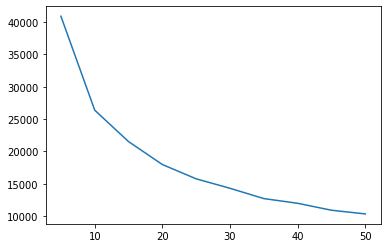

In [27]:
import matplotlib.pyplot as plt

plt.plot([i[1] for i in scores], [i[2] for i in scores])
plt.show()

In [24]:
all_sentences.to_csv('all_physical_sentences.csv', index=False)

In [28]:
import pickle

In [29]:
with open('clusters.pkl', 'wb') as f:
    pickle.dump(scores, f)

### Analyze clusters

In [4]:
all_sentences = pd.read_csv('all_physical_sentences.csv')

In [575]:
with open('clusters.pkl', 'rb') as f:
    scores = pickle.load(f)

In [30]:
scores

[(KMeans(n_clusters=5), 5, 40916.005191324235),
 (KMeans(n_clusters=10), 10, 26379.292550087193),
 (KMeans(n_clusters=15), 15, 21520.343876857503),
 (KMeans(n_clusters=20), 20, 17972.838508140943),
 (KMeans(n_clusters=25), 25, 15759.80111973535),
 (KMeans(n_clusters=30), 30, 14297.352107535062),
 (KMeans(n_clusters=35), 35, 12704.999583251705),
 (KMeans(n_clusters=40), 40, 11977.035376253176),
 (KMeans(n_clusters=45), 45, 10902.311930137515),
 (KMeans(n_clusters=50), 50, 10332.808488945626)]

In [116]:
kmeans = scores[2][0]

In [117]:
all_sentences['cluster'] = kmeans.labels_

In [2]:
cluster_contents = {}

In [119]:
all_sentences[word_cols][all_sentences['cluster']==0].sum().sort_values(ascending=False)[:10]

soils       1900
acid        1718
suitable    1572
ph          1572
neutral     1500
alkaline    1433
basic       1297
grow         328
saline        67
erigeron       0
dtype: int64

In [3]:
cluster_contents[0] = 'pH'

In [121]:
all_sentences[word_cols][all_sentences['cluster']==1].sum().sort_values(ascending=False)[:10]

soil        707
drained     707
suitable    707
soils       707
prefers     707
light       703
sandy       703
loamy       695
medium      695
clay        414
dtype: int64

In [4]:
cluster_contents[1] = 'soil texture'

In [123]:
all_sentences[word_cols][all_sentences['cluster']==2].sum().sort_values(ascending=False)[:10]

zone           1234
hardy          1234
uk             1234
tender          323
frost           323
10               25
zostera           0
emilia            0
engelmannii       0
encelia           0
dtype: int64

In [5]:
cluster_contents[2] = 'hardiness zone'

In [125]:
all_sentences[word_cols][all_sentences['cluster']==3].sum().sort_values(ascending=False)[:10]

male             1341
female           1341
hermaphrodite    1145
organs           1145
pollinated       1072
insects           519
bees              260
wind              257
flowers           201
monoecious        196
dtype: int64

In [6]:
cluster_contents[3] = 'pollination'

In [127]:
all_sentences[word_cols][all_sentences['cluster']==4].sum().sort_values(ascending=False)[:10]

grow             625
shade            603
water             22
zostera            0
engelmannii        0
elliottii          0
ellipsoidalis      0
elliptica          0
elodea             0
elymus             0
dtype: int64

In [7]:
cluster_contents[4] = 'grows in shade/does not grow in shade?'

In [129]:
all_sentences[word_cols][all_sentences['cluster']==5].sum().sort_values(ascending=False)[:10]

heavy       669
clay        669
soils       617
loamy       597
medium      597
suitable    597
sandy       558
light       558
grow        124
soil        104
dtype: int64

In [8]:
cluster_contents[5] = 'soil texture'

In [131]:
all_sentences[word_cols][all_sentences['cluster']==6].sum().sort_values(ascending=False)[:10]

soil        1552
prefers     1551
moist       1494
dry          552
drought      256
tolerate     256
wet          226
grow          55
water         54
drained        1
dtype: int64

In [9]:
cluster_contents[6] = 'soil moisture'

In [133]:
all_sentences[word_cols][all_sentences['cluster']==7].sum().sort_values(ascending=False)[:10]

shade          1946
woodland       1094
semi            969
grow            969
light           969
deep            125
empetrum          0
engelmannii       0
encelia           0
zostera           0
dtype: int64

In [10]:
cluster_contents[7] = 'light'

In [135]:
all_sentences[word_cols][all_sentences['cluster']==8].sum().sort_values(ascending=False)[:10]

plant            392
fertile          392
self             392
zostera            0
encelia            0
eleocharis         0
elliottii          0
ellipsoidalis      0
elliptica          0
elodea             0
dtype: int64

In [11]:
cluster_contents[8] = 'plant is self-fertile'

In [137]:
all_sentences[word_cols][all_sentences['cluster']==9].sum().sort_values(ascending=False)[:10]

growing      591
flower       517
deciduous    400
rate         347
shrub        289
tree         263
july         209
evergreen    176
june         173
august       153
dtype: int64

In [12]:
cluster_contents[9] = 'deciduous/evergreen, growth rate, tree/shrub, flowering time'

In [139]:
all_sentences[word_cols][all_sentences['cluster']==10].sum().sort_values(ascending=False)[:10]

growing      915
perennial    664
1ft          469
8in          299
2ft          241
0ft          212
rate         208
3ft          207
3in          183
4in          165
dtype: int64

In [13]:
cluster_contents[10] = 'growth rate?'

In [141]:
all_sentences[word_cols][all_sentences['cluster']==11].sum().sort_values(ascending=False)[:10]

seeds        625
ripen        625
flower       622
october      370
august       343
july         308
september    306
june         261
leaf         215
year         180
dtype: int64

In [14]:
cluster_contents[11]= 'flowering and fruitng time'

In [143]:
all_sentences[word_cols][all_sentences['cluster']==12].sum().sort_values(ascending=False)[:10]

male          240
female        240
sex           120
seed          120
individual    120
dioecious     120
plant         120
grown         120
plants        120
required      120
dtype: int64

In [15]:
cluster_contents[12] = 'dioecious plants'

In [145]:
all_sentences[word_cols][all_sentences['cluster']==13].sum().sort_values(ascending=False)[:20]

soil             488
soils            278
suitable         264
grow             264
sandy            260
light            260
loamy            251
medium           251
prefers          238
drained          238
nutritionally    223
poor             223
clay             204
heavy            204
equisetum          0
emarginata         0
elata              0
elegans            0
eleocharis         0
elliottii          0
dtype: int64

In [16]:
cluster_contents[13] = 'soil texture'

In [147]:
all_sentences[word_cols][all_sentences['cluster']==14].sum().sort_values(ascending=False)[:10]

exposure     244
maritime     244
plant        244
tolerates    155
strong       155
winds        155
tolerate      89
elymus         0
empetrum       0
elodea         0
dtype: int64

In [18]:
cluster_contents[14] = 'wind tolerance and maritime exposure'

In [19]:
cluster_contents

{0: 'pH',
 1: 'soil texture',
 2: 'hardiness zone',
 3: 'pollination',
 4: 'grows in shade/does not grow in shade?',
 5: 'soil texture',
 6: 'soil moisture',
 7: 'light',
 8: 'plant is self-fertile',
 9: 'deciduous/evergreen, growth rate, tree/shrub, flowering time',
 10: 'growth rate?',
 11: 'flowering and fruitng time',
 12: 'dioecious plants',
 13: 'soil texture',
 14: 'wind tolerance and maritime exposure'}

In [148]:
all_sentences.to_csv('all_physical_sentences.csv', index=False)

In [33]:
complete_sentences = physical['text'].apply(sent_tokenize)

In [110]:
ph_sentences = complete_sentences.apply(lambda x: [s for s in x if 
                                                   ' pH' in s])
ph_sentences.value_counts()[:5]

[]                                                                                              4005
[Suitable pH: acid, neutral and basic (alkaline) soils.]                                        1074
[Suitable pH: acid and neutral soils.]                                                           143
[Suitable pH: acid, neutral and basic (alkaline) soils and can grow in very alkaline soils.]      85
[Suitable pH: acid soils and can grow in very acid soils.]                                        61
Name: text, dtype: int64

In [57]:
pfaf['physical characteristics'].fillna('', inplace=True)

In [61]:
pfaf['very acidic soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'very acid' in x.lower())
pfaf['acidic soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'acid' in x.lower())
pfaf['neutral soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'neutral' in x.lower())
pfaf['alkaline soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'alkaline' in x.lower())
pfaf['very alkaline soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'very alkaline' in x.lower())
pfaf['saline soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'saline' in x.lower())

In [62]:
pfaf.to_csv('pfaf_data.csv', index=False)

In [109]:
texture_sentences = complete_sentences.apply(
    lambda x: [s for s in x if ('sandy' in s or 'loamy' in s or 
                                'clay' in s)])
texture_sentences.value_counts()[:5]

[]                                                                                                                            4009
[Suitable for: light (sandy), medium (loamy) and heavy (clay) soils and prefers well-drained soil.]                            413
[Suitable for: light (sandy), medium (loamy) and heavy (clay) soils.]                                                          396
[Suitable for: light (sandy) and medium (loamy) soils and prefers well-drained soil.]                                          278
[Suitable for: light (sandy) and medium (loamy) soils, prefers well-drained soil and can grow in nutritionally poor soil.]      95
Name: text, dtype: int64

In [65]:
pfaf['coarse soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'sandy' in x.lower())
pfaf['medium soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'loamy' in x.lower())
pfaf['fine soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'clay' in x.lower())
pfaf['drained soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'well-drained' in x.lower())
pfaf['tolerates poor soil'] = pfaf['physical characteristics'].apply(
    lambda x: 'nutritionally poor' in x.lower())

In [66]:
pfaf.to_csv('pfaf_data.csv', index=False)

In [68]:
all_sentences = pd.read_csv('all_physical_sentences.csv')

In [111]:
sex_sentences = complete_sentences.apply(
    lambda x: [s for s in x if ('male' in s or 'female' in s or 
                                'hermaphrodite' in s)])
sex_sentences.value_counts()[:5]

[]                                                                                                                                                      4114
[The species is hermaphrodite (has both male and female organs) and is pollinated by Insects.]                                                           449
[The species is hermaphrodite (has both male and female organs).]                                                                                        260
[The species is monoecious (individual flowers are either male or female, but both sexes can be found on the same plant) and is pollinated by Wind.]     162
[The species is hermaphrodite (has both male and female organs) and is pollinated by Bees.]                                                              153
Name: text, dtype: int64

In [75]:
pfaf['monoecious'] = pfaf['physical characteristics'].apply(
    lambda x: 'monoecious' in x.lower())
pfaf['dioecious'] = pfaf['physical characteristics'].apply(
    lambda x: 'dioecious' in x.lower())
pfaf['hermaphrodite'] = pfaf['physical characteristics'].apply(
    lambda x: 'hermaphrodite' in x.lower())

In [83]:
pfaf['self-fertile'] = pfaf['physical characteristics'].apply(
    lambda x: 'is self-fertile' in x)

In [105]:
pollinators = ['insects', 'bees', 'wind', 'flies', 'butterflies', 
              'moths', 'beetles', 'midges']
for p in pollinators:
    if p in ['butterflies', 'moths']:
        pfaf[f'pollinated by {p}'] = (pfaf['physical '
                                          'characteristics'].apply(
            lambda x: (p in x.lower() or 'lepidoptera' in x.lower())))
    else:
        pfaf[f'pollinated by {p}'] = pfaf['physical '
                                          'characteristics'].apply(
            lambda x: p in x.lower())

In [112]:
pfaf.to_csv('pfaf_data.csv', index=False)

In [117]:
moisture_sentences = complete_sentences.apply(lambda x: [s for s in 
    x if ('moist' in s.lower() or 'dry' in s.lower() or 'drought' 
          in s.lower() or 'wet' in s.lower() or 'water' in s.lower())])
moisture_sentences.value_counts()[:6]

[]                                                          4005
[It prefers moist soil.]                                     755
[It prefers dry or moist soil.]                              337
[It prefers dry or moist soil and can tolerate drought.]     191
[It prefers moist or wet soil.]                              127
[It prefers wet soil and can grow in water.]                  40
Name: text, dtype: int64

In [120]:
for m in ['dry', 'moist', 'wet']:
    pfaf[f'{m} soil'] = pfaf['physical characteristics'].apply(
        lambda x: m in x.lower())
pfaf['grows in water'] = pfaf['physical characteristics'].apply(
    lambda x: 'in water' in x.lower())
pfaf['drought tolerant'] = pfaf['physical characteristics'].apply(
    lambda x: 'drought' in x.lower())

In [122]:
pfaf.to_csv('pfaf_data.csv', index=False)

In [125]:
light_sentences = complete_sentences.apply(lambda x: [s for s in x 
    if 'shade' in s.lower()])
light_sentences.value_counts()

[]                                                                                      4005
[It can grow in semi-shade (light woodland) or no shade.]                                787
[It cannot grow in the shade.]                                                           603
[It can grow in full shade (deep woodland) semi-shade (light woodland) or no shade.]      65
[It can grow in full shade (deep woodland) or semi-shade (light woodland).]               60
[It can grow in semi-shade (light woodland).]                                             57
Name: text, dtype: int64

In [127]:
pfaf['full sun'] = pfaf['physical characteristics'].apply(lambda x: 
    ('no shade' in x.lower() or 'cannot grow in the shade' in x.lower()))
pfaf['partial shade'] = pfaf['physical characteristics'].apply(lambda x: 
    'semi-shade' in x.lower())
pfaf['full shade'] = pfaf['physical characteristics'].apply(lambda x: 
    'full shade' in x.lower())

In [128]:
pfaf['full shade'].value_counts()

False    5452
True      125
Name: full shade, dtype: int64

In [236]:
leaf_sentences = complete_sentences.apply(lambda x: [s for s in x 
    if 'in leaf' in s.lower()])
leaf_sentences.value_counts()[:5]

[]                                                           5273
[It is in leaf all year.]                                      34
[It is in leaf all year, in flower from July to August.]       18
[It is in leaf all year, in flower from April to May.]         13
[It is in leaf all year, and the seeds ripen in October.]      11
Name: text, dtype: int64

In [131]:
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 
          'May': 5, 'June': 6, 'July': 7, 'August': 8, 
          'September': 9, 'October': 10, 'November': 11, 
          'December': 12}

In [203]:
in_leaf_cols = pfaf['physical characteristics'].str.split(
    r'(?<=in leaf from )([A-Z]{1}[a-z]+) to ([A-Z]{1}[a-z]+)', expand=True)
in_leaf_cols = in_leaf_cols[[1, 2]]
in_leaf_cols.rename({1: 'min', 2: 'max'}, axis=1, inplace=True)
in_leaf_cols['min'] = np.where(pfaf['physical characteristics'].str.contains(
    'in leaf all year'), 'January', in_leaf_cols['min'])
in_leaf_cols['max'] = np.where(pfaf['physical characteristics'].str.contains(
    'in leaf all year'), 'December', in_leaf_cols['max'])

In [204]:
in_flower_cols = pfaf['physical characteristics'].str.split(
    r'(?<=in flower from )([A-Z]{1}[a-z]+) to ([A-Z]{1}[a-z]+)', expand=True)
in_flower_cols = in_flower_cols[[1, 2]]
in_flower_cols.rename({1: 'min', 2: 'max'}, axis=1, inplace=True)
in_flower_in = pfaf['physical characteristics'].str.split(
    r'(?<=in flower in )([A-Z]{1}[a-z]+)', expand=True)[1]
in_flower_in.fillna('', inplace=True)
in_flower_cols['min'] = np.where(in_flower_in!='', in_flower_in, in_flower_cols['min'])
in_flower_cols['max'] = np.where(in_flower_in!='', in_flower_in, in_flower_cols['max'])

In [205]:
seed_cols = pfaf['physical characteristics'].str.split(
    r'(?<=seeds ripen from )([A-Z]{1}[a-z]+) to ([A-Z]{1}[a-z]+)', expand=True)
seed_cols = seed_cols[[1, 2]]
seed_cols.rename({1: 'min', 2: 'max'}, axis=1, inplace=True)
seed_in = pfaf['physical characteristics'].str.split(
    r'(?<=seeds ripen in )([A-Z]{1}[a-z]+)', expand=True)[1]
seed_in.fillna('', inplace=True)
seed_cols['min'] = np.where(seed_in!='', seed_in, seed_cols['min'])
seed_cols['max'] = np.where(seed_in!='', seed_in, seed_cols['max'])

In [206]:
in_leaf_cols.replace(months, inplace=True)
in_flower_cols.replace(months, inplace=True)
seed_cols.replace(months, inplace=True)
in_leaf_cols.fillna(0, inplace=True)
in_flower_cols.fillna(0, inplace=True)
seed_cols.fillna(0, inplace=True)

In [217]:
for i,month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
                          'oct', 'nov', 'dec']):
    num = i+1
    pfaf[f'leaf {month}'] = np.where((((in_leaf_cols['min'] <= num) & (in_leaf_cols['max'] >= num)) |
                             ((in_leaf_cols['min'] > in_leaf_cols['max']) &
                             ((in_leaf_cols['min'] >= num) | (in_leaf_cols['max'] <= num)))), True, False)
    pfaf[f'flower {month}'] = np.where((((in_flower_cols['min'] <= num) & (in_flower_cols['max'] >= num)) |
                             ((in_flower_cols['min'] > in_flower_cols['max']) &
                             ((in_flower_cols['min'] >= num) | (in_flower_cols['max'] <= num)))), True, False)#     pfaf[f'seed {month}'] = (((seed_cols['min'] <= num) & (seed_cols['max'] >= num)) |
    pfaf[f'seed {month}'] = np.where((((seed_cols['min'] <= num) & (seed_cols['max'] >= num)) |
                             ((seed_cols['min'] > seed_cols['max']) &
                             ((seed_cols['min'] >= num) | (seed_cols['max'] <= num)))), True, False)

In [219]:
pfaf.to_csv('pfaf_data.csv', index=False)

In [235]:
tolerance_sentences = complete_sentences.apply(lambda x: [s for s in x if ('tolerate' in
    s.lower() or 'tolerant' in s.lower()) and 'drought' not in s.lower()])
tolerance_sentences.value_counts()[:5]

[]                                                                                                           5306
[The plant can tolerates strong winds but not maritime exposure.]                                             111
[The plant can tolerate maritime exposure.]                                                                    81
[The plant can tolerates strong winds but not maritime exposure., It can tolerate atmospheric pollution.]      36
[It can tolerate atmospheric pollution.]                                                                       16
Name: text, dtype: int64

In [231]:
pfaf['wind tolerant'] = pfaf['physical characteristics'].apply(lambda x: 'tolerates '
    'strong winds' in x)
pfaf['maritime tolerant'] = pfaf['physical characteristics'].apply(lambda x: 'can '
    'tolerate maritime exposure' in x)
pfaf['pollution tolerant'] = pfaf['physical characteristics'].apply(lambda x: 'can '
    'tolerate atmospheric pollution' in x)

In [234]:
growth_rate_sentences = complete_sentences.apply(lambda x: [s for s in x if ' rate' in s])
growth_rate_sentences.value_counts()[:5]

[]                                                                                                            5018
[Artemisia dracunculus is a PERENNIAL growing to 0.6 m (2ft) by 0.3 m (1ft in) at a medium rate.]                1
[Pinus contorta is an evergreen Tree growing to 15 m (49ft) by 8 m (26ft) at a fast rate.]                       1
[Solidago simplex is a PERENNIAL growing to 0.6 m (2ft) at a fast rate.]                                         1
[Armeria maritima is an evergreen Perennial growing to 0.1 m (0ft 4in) by 0.2 m (0ft 8in) at a slow rate.]       1
Name: text, dtype: int64

In [237]:
pfaf['fast growth'] = pfaf['physical characteristics'].apply(lambda x: 'fast rate' in x)
pfaf['medium growth'] = pfaf['physical characteristics'].apply(lambda x: 'medium rate' in x)
pfaf['slow growth'] = pfaf['physical characteristics'].apply(lambda x: 'slow rate' in x)

In [238]:
pfaf.to_csv('pfaf_data.csv', index=False)